# PREPARACIÓN DE LOS DATOS

In [58]:
import pandas as pd
import numpy as np
from numpy.random import randn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from datetime import datetime
%matplotlib inline
pd.set_option('display.max_columns', 30)

# Dataset - Francia (FR)
YTdata = pd.read_csv('FRvideos_cc50_202101.csv')
YTdata
print(YTdata.shape)
YTdata.sample(5)

(40724, 20)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
27708,PVbQrvlB_gw,18.04.04,Eminem - Framed,EminemVEVO,10,2018-04-03T16:00...,"Eminem""|""Framed""...",2127419,216109,6431,27422,https://i.ytimg....,False,False,False,The official vid...,Centre,47.083727,2.399998,POINT (2.3999979...
24990,IsDxRxdQZRg,18.21.03,قدور و عويشة - 2...,Baraka lBaraka,23,2018-03-20T12:20...,"baraka""|""قدور وع...",304661,16095,552,1910,https://i.ytimg....,False,False,False,باش يوصلكم الجدي...,Poitou Charentes,46.583292,0.333277,POINT (0.3332765...
14003,-AGFce687ng,18.25.01,الطبيبة الشرعية ...,Hespress,25,2018-01-24T14:49...,"هاجر عدلوني""|""وف...",431698,1725,175,624,https://i.ytimg....,False,False,False,الطبيبة الشرعية ...,Bretagne,48.516663,-2.783303,POINT (-2.783303...
19666,SBTD6BOTvWw,18.22.02,Zemmour et Naull...,Politika France,25,2018-02-22T04:34...,[none],274,22,2,4,https://i.ytimg....,False,False,False,NaN,Guinaa,4.729981,-52.330021,POINT (-52.33002...
6512,F_r6iYD3U9U,17.16.12,LES ROIS DU GAMI...,Yes vous aime,23,2017-12-14T16:45...,"Bagel""|""Golden M...",79917,7508,449,814,https://i.ytimg....,False,False,False,Instagram: @yesv...,Alsace,47.750404,7.349980,POINT (7.3499800...


In [3]:
print("Filas y columnas",YTdata.shape)

Filas y columnas (40724, 20)


In [4]:
print(YTdata.dtypes)

video_id                   object
trending_date              object
title                      object
channel_title              object
category_id                 int64
publish_time               object
tags                       object
views                       int64
likes                       int64
dislikes                    int64
comment_count               int64
thumbnail_link             object
comments_disabled            bool
ratings_disabled             bool
video_error_or_removed       bool
description                object
state                      object
lat                       float64
lon                       float64
geometry                   object
dtype: object


# PRE-PROCESAR LOS DATOS

In [5]:
YTdata_2 = YTdata.copy()

In [6]:
# TRANSFORMACION DE VARIABLES Y AGREGACION DE COLUMNAS PARA EL ANALISIS DEL DATASET

# Convert boolean columns to numeric (0 and 1)
#YTdata_2['comments_disabled'] = YTdata_2['comments_disabled'].astype(bool).astype(int)
YTdata_2['ratings_disabled'] = YTdata_2['ratings_disabled'].astype(int)
YTdata_2['video_error_or_removed'] = YTdata_2['video_error_or_removed'].astype(int)

YTdata_2['state_number'], unique_states = pd.factorize(YTdata_2['state'])
YTdata_2['channel_number'], unique_states = pd.factorize(YTdata_2['channel_title'])
YTdata_2['title_number'], unique_states = pd.factorize(YTdata_2['title'])
# Numero de caracteres
YTdata_2['tags_length'] = YTdata_2['tags'].apply(lambda x: len(str(x)))

# evitar errores de lectura de la fecha
YTdata_2['trending_date'] = pd.to_datetime(YTdata_2['trending_date'], errors='coerce')
YTdata_2['publish_time'] = pd.to_datetime(YTdata_2['publish_time'], errors='coerce')

#YTdata_2['likes_value'] = (YTdata_2['likes'] > YTdata_2['dislikes']).astype(int)
YTdata_2['likes_value'] = YTdata_2.apply(lambda row: 'liked' if row['likes'] > row['dislikes'] else 'disliked', axis=1)


C:\Users\PC\AppData\Local\Temp\ipykernel_19468\383218064.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  YTdata_2['trending_date'] = pd.to_datetime(YTdata_2['trending_date'], errors='coerce')


video_id                      0
trending_date             25416
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                       5304
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description                2912
state                         0
lat                           0
lon                           0
geometry                      0
state_number                  0
channel_number                0
title_number                  0
tags_length                   0
likes_value                   0
dtype: int64


<Axes: >

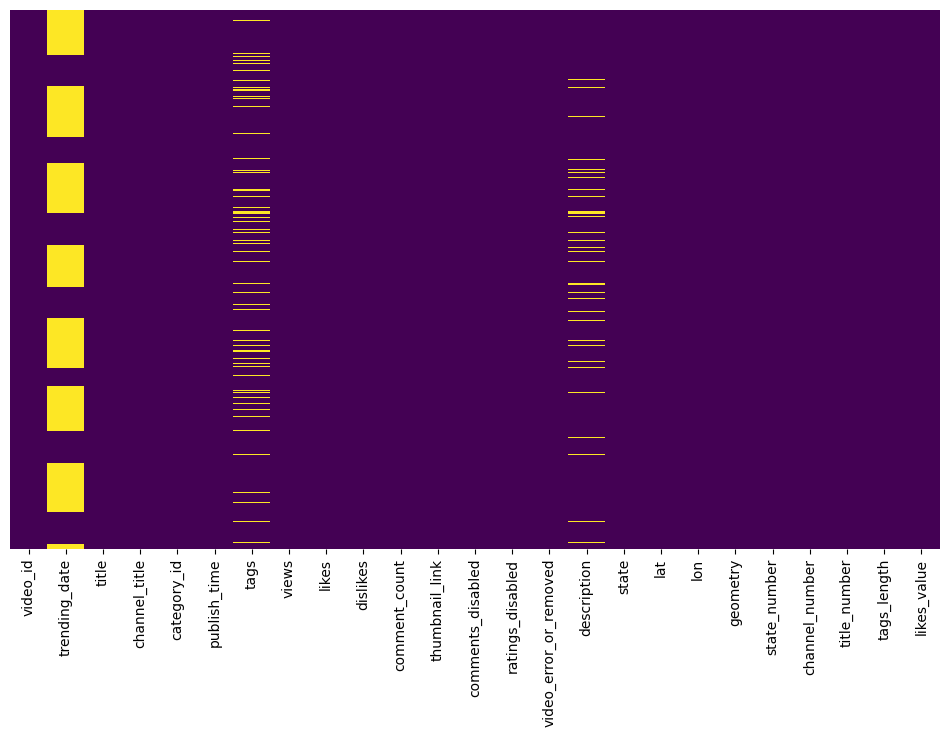

In [7]:
none_values = (YTdata_2 == '[none]') | YTdata_2.isnull() | YTdata_2.isna() | YTdata_2.isna().astype(bool)

count_none = none_values.sum()
print(count_none)

plt.figure(figsize=(12, 7))
sns.heatmap(none_values, yticklabels=False, cbar=False, cmap='viridis')


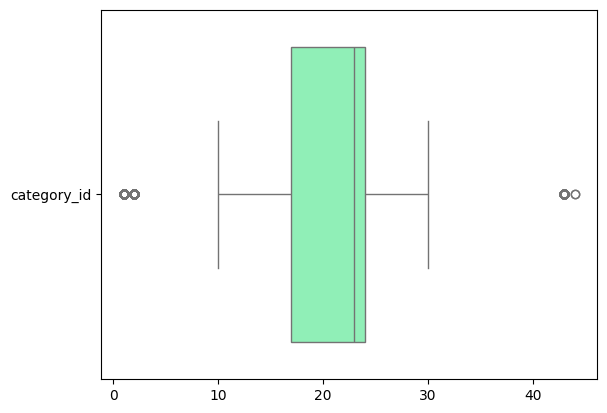

In [8]:
collss = YTdata_2.columns[0:5] 
sns.boxplot(data=YTdata_2[collss], palette='rainbow', orient='h')
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_19468\1499080945.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=YTdata_2['views'], palette='rainbow', orient='h')


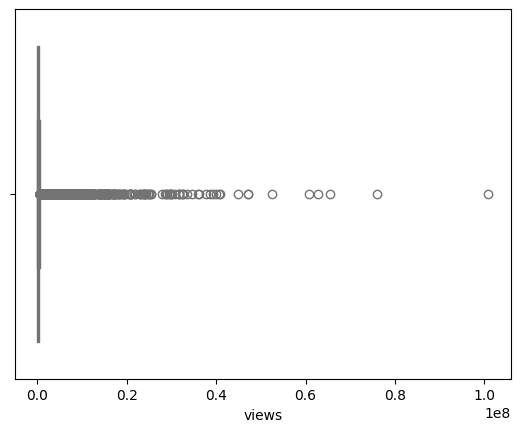

In [9]:
sns.boxplot(data=YTdata_2['views'], palette='rainbow', orient='h')
plt.show()

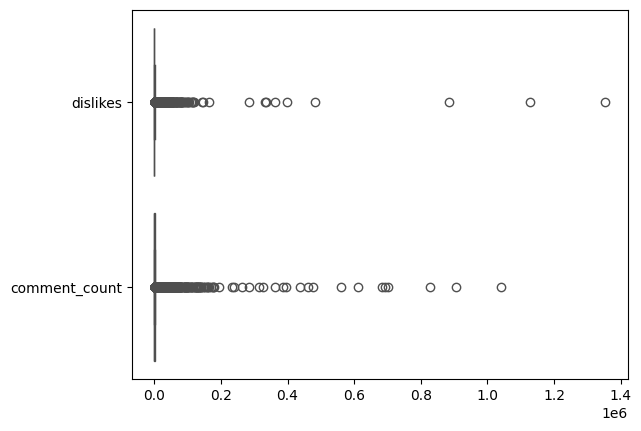

In [10]:
collss = YTdata_2.columns[9:12] 
sns.boxplot(data=YTdata_2[collss], palette='rainbow', orient='h')
plt.show()


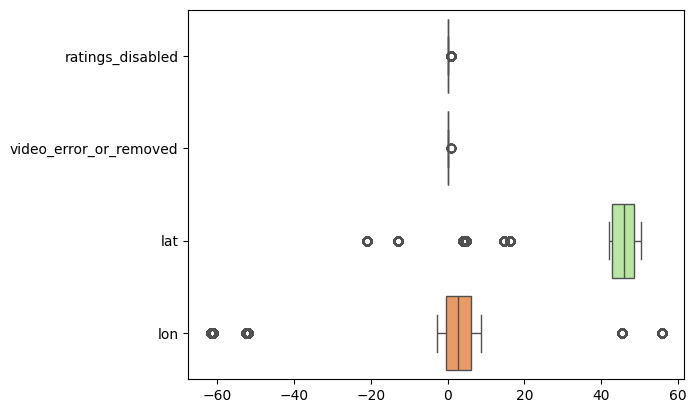

In [11]:
collss = YTdata_2.columns[13:20] 
sns.boxplot(data=YTdata_2[collss], palette='rainbow', orient='h')
plt.show()


In [12]:
# LIMPIEZA DE DATOS

mode_trending_date = YTdata_2['trending_date'].dropna().mode().iloc[0]

YTdata_2['trending_date'] = YTdata_2['trending_date'].fillna(mode_trending_date)
YTdata_2['trending_date'] = YTdata_2['trending_date'].apply(lambda x: mode_trending_date if pd.isna(x) else x)
YTdata_2['trending_date'].sample(5)

2644    2001-01-18
1508    2001-01-18
16881   2002-08-18
7649    2001-01-18
28351   2004-07-18
Name: trending_date, dtype: datetime64[ns]

In [13]:
YTdata_2['trending_day'] = YTdata_2['trending_date'].dt.day
YTdata_2['trending_month'] = YTdata_2['trending_date'].dt.month
YTdata_2['trending_year'] = YTdata_2['trending_date'].dt.year

YTdata_2['publish_day'] = YTdata_2['publish_time'].dt.day
YTdata_2['publish_month'] = YTdata_2['publish_time'].dt.month
YTdata_2['publish_year'] = YTdata_2['publish_time'].dt.year
YTdata_2['trending_year'].sample(5)

40603    2001
25123    2001
20946    2003
10356    2001
25832    2001
Name: trending_year, dtype: int32

Numero de outliers por columna:
trending_year      0
views            595
likes            768
dislikes         808
comment_count    899
category_id        0
dtype: int64


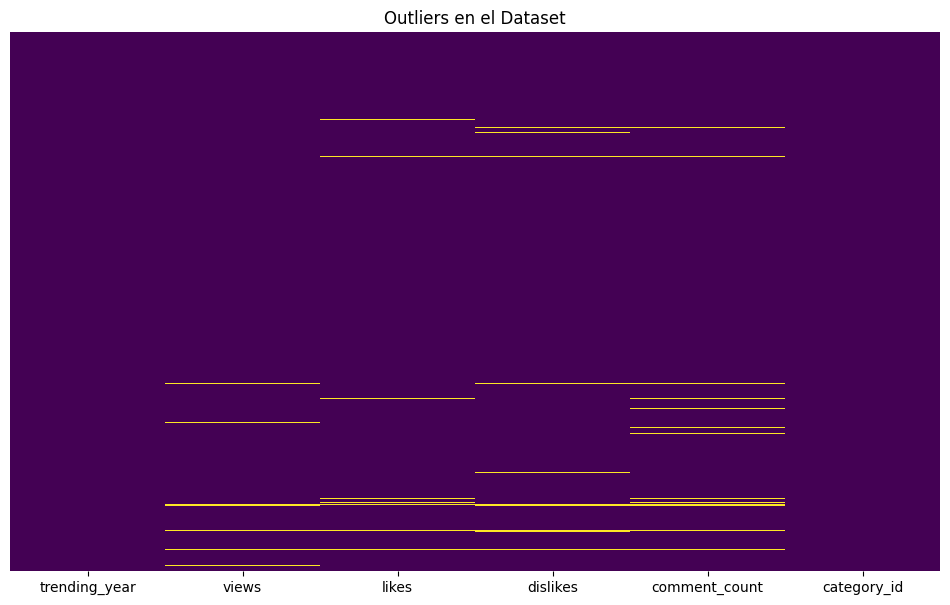

In [14]:
outl = [
    'trending_year','views', 'likes', 'dislikes','comment_count','category_id']
datout =  YTdata_2[outl]
# Calcular el IQR para detectar outliers
Q1 = datout.quantile(0.05)
Q3 = datout.quantile(0.95)
IQR = Q3 - Q1

# Definir límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detectar outliers: valores fuera de los límites
outl = (datout < lower_bound) | (datout > upper_bound)

# Contar cuántos outliers existen en cada columna
count_outliers = outl.sum()
print("Numero de outliers por columna:")
print(count_outliers)

# Graficar los outliers en un heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(outl, yticklabels=False, cbar=False, cmap='viridis')

# Etiquetas y título
plt.title('Outliers en el Dataset')

# Mostrar la gráfica
plt.show()

In [15]:
# LIMPIEZA DE OUTLIERS, RANGO INTERQUANTILICO

lower_percentile = 1
upper_percentile = 99

# Specify columns for outlier treatment
outlierss = [
    'trending_date','views', 'likes', 'dislikes','comment_count']

# Now apply outlier treatment only to selected columns
columns_to_process = [col for col in outlierss]

# Calculate percentile values for the selected columns
lower_bound = YTdata_2[columns_to_process].quantile(lower_percentile / 100)
upper_bound = YTdata_2[columns_to_process].quantile(upper_percentile / 100)

# Create a copy to avoid modifying the original data
YTDATA = YTdata_2.copy()

# Replace outliers with the mode of each column
YTDATA[columns_to_process] = YTDATA[columns_to_process].apply(
    lambda x: x.where((x >= lower_bound[x.name]) & (x <= upper_bound[x.name]), YTdata_2[x.name].mode().iloc[0])
)

# Verify the result
print("Tamano del dataset:", YTDATA.shape)
print("NaNs:", YTDATA.isna().sum().sum())
print("Tienen NAN:", YTDATA.isna().sum())


Tamano del dataset: (40724, 31)
NaNs: 2912
Tienen NAN: video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               2912
state                        0
lat                          0
lon                          0
geometry                     0
state_number                 0
channel_number               0
title_number                 0
tags_length                  0
likes_value                  0
trending_day                 0
trending_month               0
trending_year                0
publish_day                  0
publish_month                0
publish_year   

<Axes: >

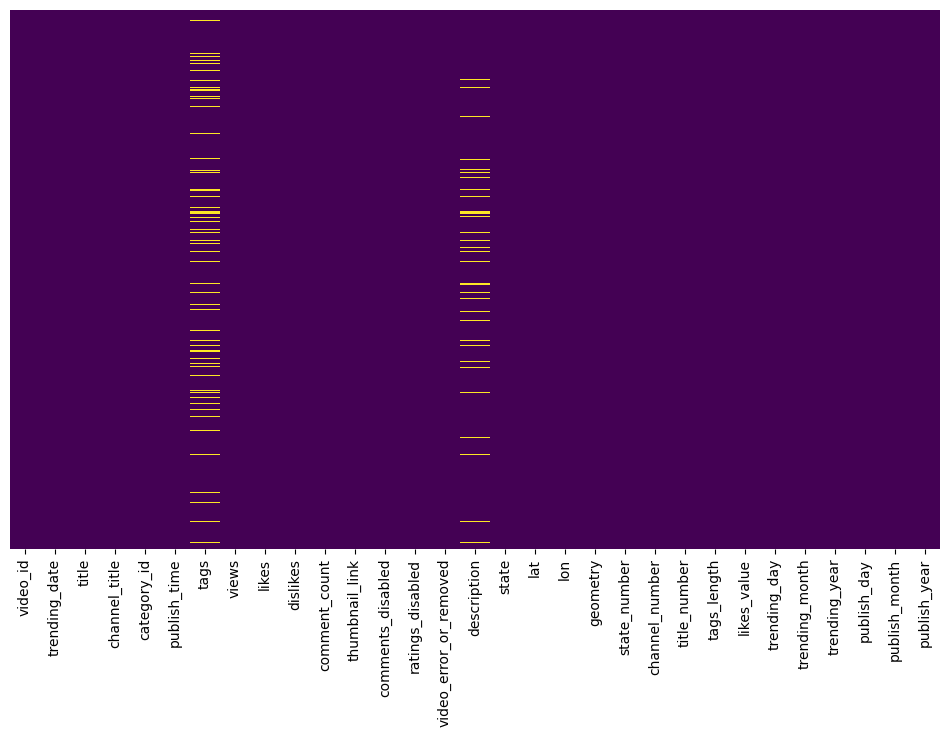

In [16]:
none_values = (YTDATA == '[none]') | YTdata_2.isnull() | YTdata_2.isna()
count_none= none_values.sum()
plt.figure(figsize=(12, 7))
sns.heatmap(none_values,yticklabels=False,cbar=False,cmap='viridis')

# ANALISIS

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

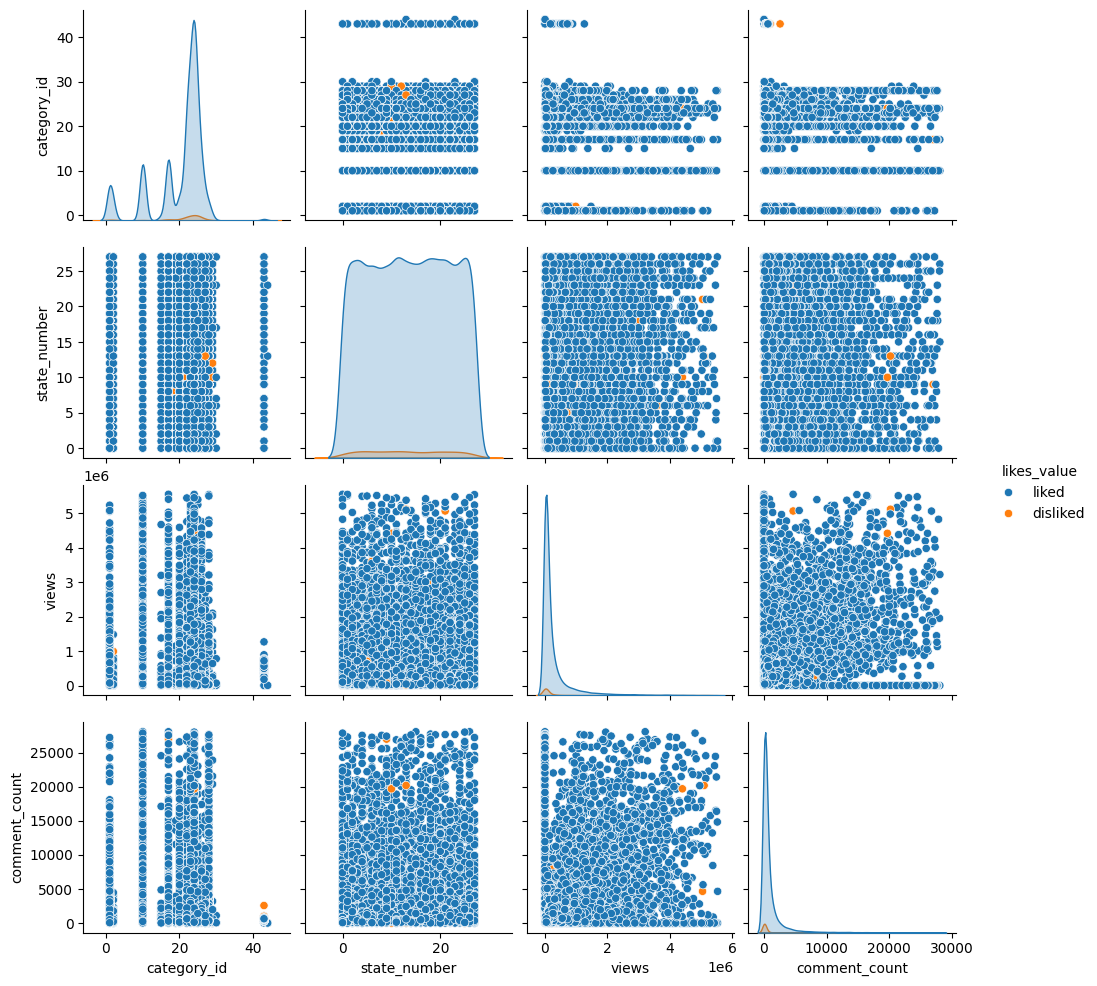

In [16]:

cols_use = ['category_id','state_number', 'views','comment_count',
            'trending_date','likes_value']

sns.pairplot(YTDATA[cols_use], hue='likes_value', diag_kind="kde")


# ¿Qué categorías de videos son las de mayor tendencia?

In [18]:
pivot_data = YTDATA.pivot_table(values='category_id', index='trending_month', columns='trending_year')
pivot_data.replace([np.inf, -np.inf], np.nan, inplace=True)
pivot_data = pivot_data.fillna(pivot_data.median())

pivot_data

trending_year,2001,2002,2003,2004,2005,2006,2012
trending_month,,,,,,,
1,20.098610,20.400000,19.515306,18.833333,19.800000,20.457286,20.655
2,20.400000,19.668342,19.984848,19.878788,20.835000,19.615000,19.885
3,20.688442,19.010050,18.929648,20.282828,20.490000,20.470000,19.765
4,20.970000,19.465000,18.949749,20.510101,20.150754,19.755000,19.850
5,20.830000,20.157360,19.395000,19.853535,20.250000,20.575000,20.705
6,20.550000,19.979798,19.427136,20.262626,21.320000,20.131579,20.325
7,20.640000,20.005000,20.055276,19.055838,20.226131,20.910000,21.100
8,19.905000,20.447236,20.795000,19.878788,19.590000,19.575000,21.450
9,20.485000,20.798995,19.994949,19.878788,20.265000,19.930000,20.895


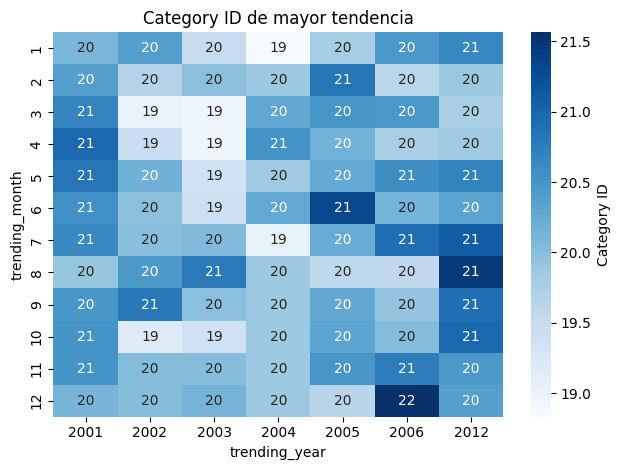

In [19]:
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='Blues', cbar_kws={'label': 'Category ID'})
plt.title('Category ID de mayor tendencia')
plt.tight_layout()
plt.show()

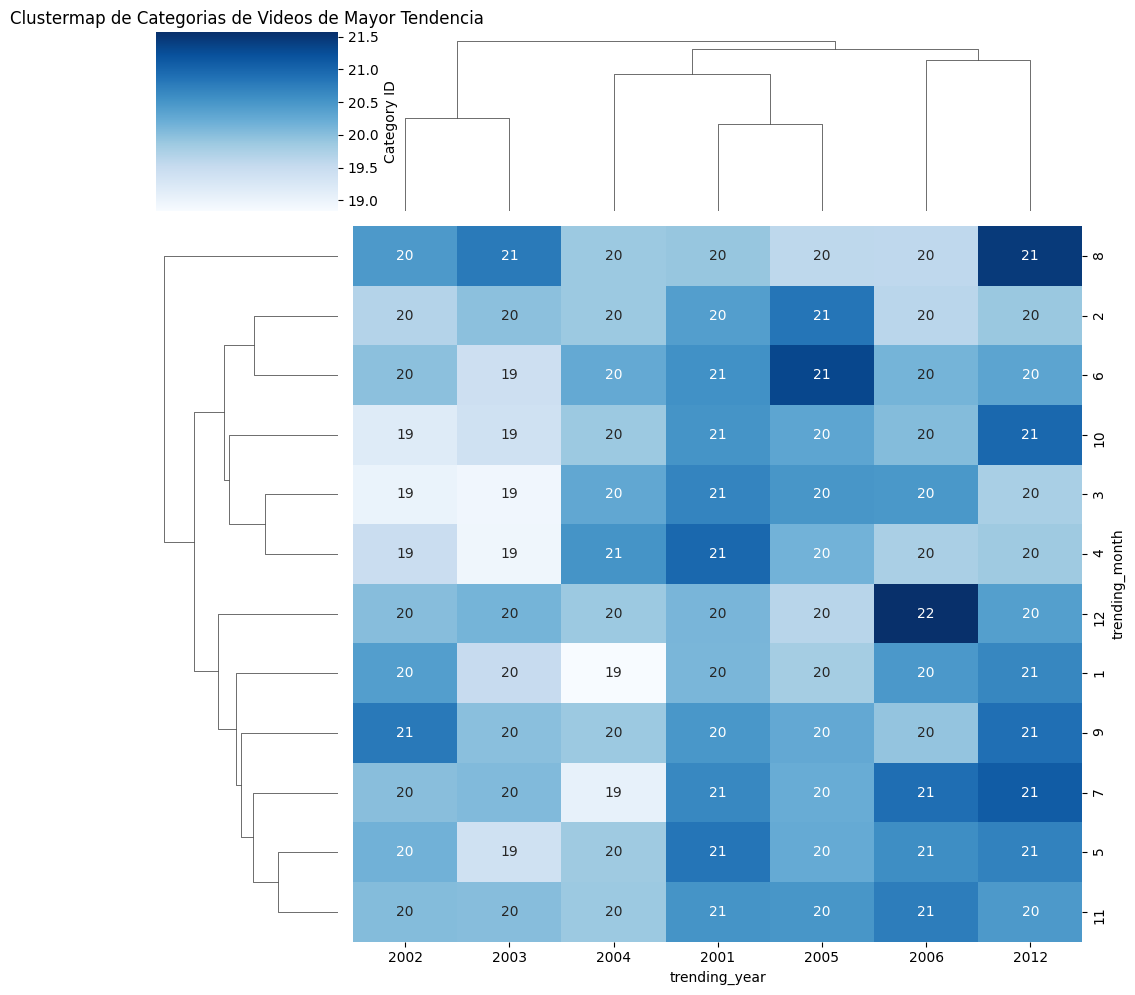

In [20]:
sns.clustermap(pivot_data, annot=True, fmt='.0f', cmap='Blues', cbar_kws={'label': 'Category ID'})
plt.title('Clustermap de Categorias de Videos de Mayor Tendencia')
plt.tight_layout()
plt.show()

# ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

In [59]:
YTDATA.groupby('category_id')[['likes', 'dislikes']].mean().transpose()

category_id,1,2,10,15,17,19,20,22,23,24,25,26,27,28,29,30,43,44
likes,9102.442745,2387.469539,28168.737456,5634.805907,7343.415937,7325.831933,14423.785469,4237.578773,23392.137002,9057.473062,2126.167111,6573.330368,10796.676203,20786.210723,12387.692982,2208.636364,2941.535354,96.0
dislikes,372.606398,77.652303,848.936138,188.147679,352.440580,92.268908,394.688828,247.857667,584.521759,409.848661,173.477345,245.298602,261.845254,497.995012,75.043860,95.272727,1048.949495,4.5


Categoría que más gusta: 10 con un promedio de 28168.73745565129 'Me gusta'.
Categoría que menos gusta: 44 con un promedio de 4.5 'Me gusta'.


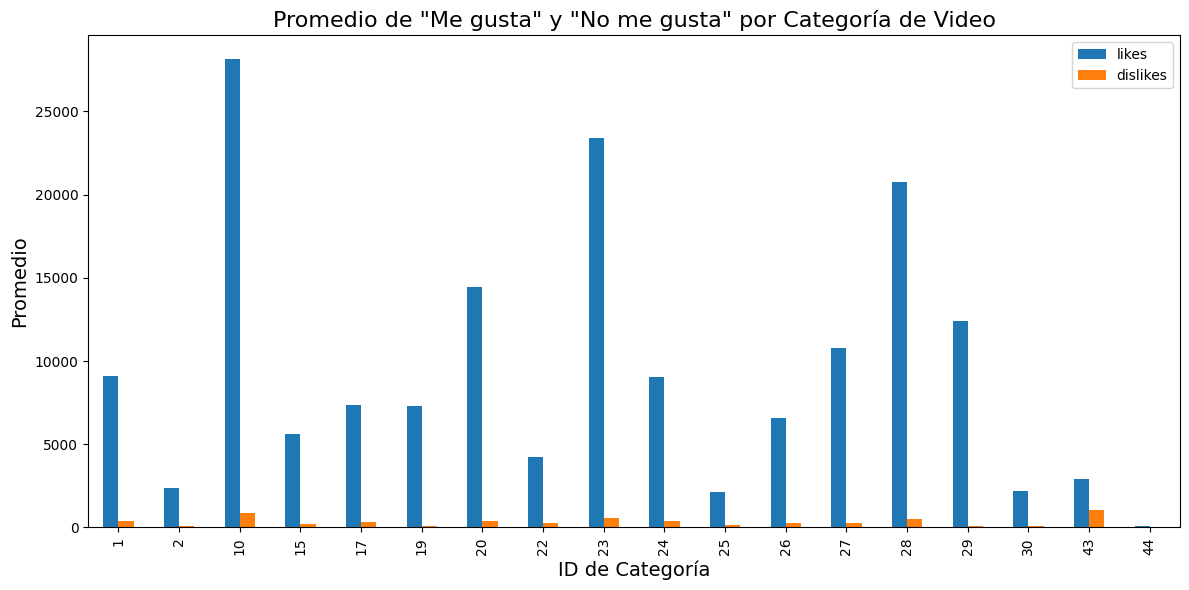

In [22]:
promedio_ld = YTDATA.groupby('category_id')[['likes', 'dislikes']].mean()

ax = promedio_ld.plot.bar(figsize=(12, 6))

category_l = promedio_ld['likes'].idxmax()
value_l = promedio_ld['likes'].max()

category_d = promedio_ld['dislikes'].idxmin()
value_d = promedio_ld['dislikes'].min()

print(f"Categoría que más gusta: {category_l} con un promedio de {value_l} 'Me gusta'.")
print(f"Categoría que menos gusta: {category_d} con un promedio de {value_d} 'Me gusta'.")

plt.title('Promedio de "Me gusta" y "No me gusta" por Categoria de Video', fontsize=16)
plt.xlabel('ID de Categoria', fontsize=14)
plt.ylabel('Promedio', fontsize=14)
plt.tight_layout()
plt.show()

# ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta”?

In [23]:
l = YTDATA['likes']
d = YTDATA['dislikes']

YTDATA['ratio'] = abs( l - d ) / (l + d)

proporcion = YTDATA.groupby('category_id')['ratio'].mean()

print(f"Categoría con mejor proporción es la {proporcion.idxmin()}.")

Categoría con mejor proporción es la 43.


# ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”?

Categoría con mejor proporción es la 19.


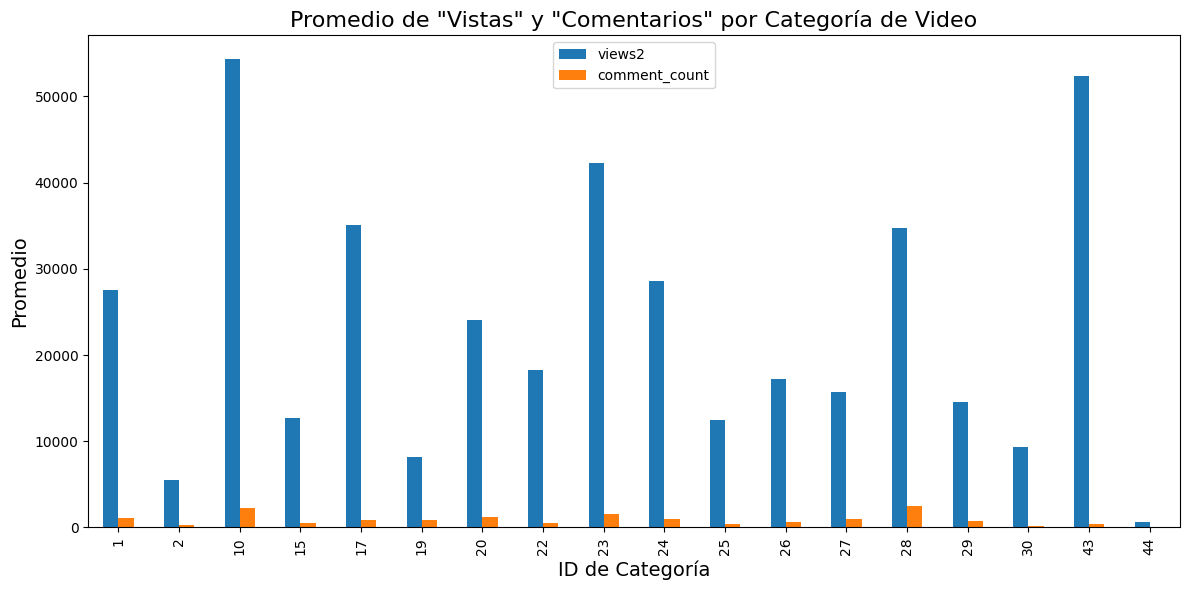

In [24]:

v = YTDATA['views'] / 10  # VISTAS EN 100K
c = YTDATA['comment_count']

# CALCULAR RATIO DE COMENTARIOS
YTDATA['ratio'] = abs(v - c) / (v + c)

proporcion_vc = YTDATA.groupby('category_id')['ratio'].mean()
print(f"Categoría con mejor proporción es la {proporcion_vc.idxmin()}.")

YTDATA['views2'] = v
VC = YTDATA.groupby('category_id')[['views2', 'comment_count']].mean()
ax = VC.plot.bar(figsize=(12, 6))

# GRAFICO
plt.title('Promedio de "Vistas" y "Comentarios" por Categoría de Video', fontsize=16)
plt.xlabel('ID de Categoría', fontsize=14)
plt.ylabel('Promedio', fontsize=14)
plt.tight_layout()
plt.show()



# ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?

El volumen disminuyo a partir del 2004


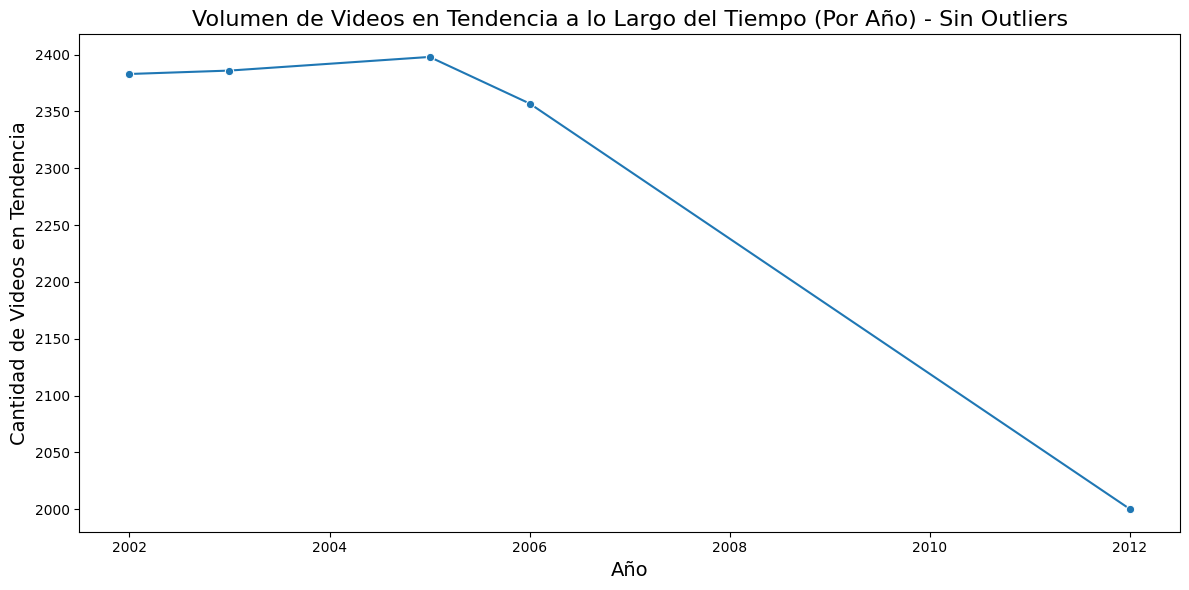

In [26]:
a = 0.01 
b = 0.99

YTDATA['trending_year'] = YTDATA['trending_date'].dt.year

t_year = YTDATA.groupby('trending_year').size().reset_index(name='video_count')

lp = t_year['video_count'].quantile(a)  
up = t_year['video_count'].quantile(b)  

tf_year = t_year[(t_year['video_count'] >= lp) & (t_year['video_count'] <= up)]

print("El volumen disminuyo a partir del 2004")

plt.figure(figsize=(12, 6))
sns.lineplot(data=tf_year, x='trending_year', y='video_count', marker='o')

plt.title("Volumen de Videos en Tendencia a lo Largo del Tiempo (Por Año) - Sin Outliers", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Cantidad de Videos en Tendencia", fontsize=14)
plt.tight_layout()
plt.show()


# ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?

In [27]:
ch_tr_count = YTDATA.groupby('channel_number')['trending_date'].nunique().reset_index(name='dias en tendencia')

# De mayor a menor
ch_tr_count = ch_tr_count.sort_values(by='dias en tendencia', ascending=False)

top_trending_channels = ch_tr_count.head(10)
print("Top 10 canales con más días en tendencia:")
print(top_trending_channels)

bottom_trending_channels = ch_tr_count.tail(10)
print("\nTop 10 canales con menos días en tendencia:")
print(bottom_trending_channels)


Top 10 canales con más días en tendencia:
      channel_number  dias en tendencia
25                25                 70
105              105                 65
19                19                 63
103              103                 63
98                98                 62
97                97                 62
61                61                 61
244              244                 56
369              369                 54
1475            1475                 54

Top 10 canales con menos días en tendencia:
      channel_number  dias en tendencia
2920            2920                  1
2915            2915                  1
2912            2912                  1
6671            6671                  1
6670            6670                  1
6669            6669                  1
6668            6668                  1
6667            6667                  1
6666            6666                  1
6665            6665                  1


# ¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?

In [28]:
#cols_use = ['likes','dislikes', 'views','state']
YTDATA['B_views']=YTDATA['views']/100
cols_use = ['likes','dislikes', 'B_views']

El estado con más 'Likes' es: Ile De France
El estado con más 'Dislikes' es: Ile De France
El estado con más 'Views' es: Ile De France


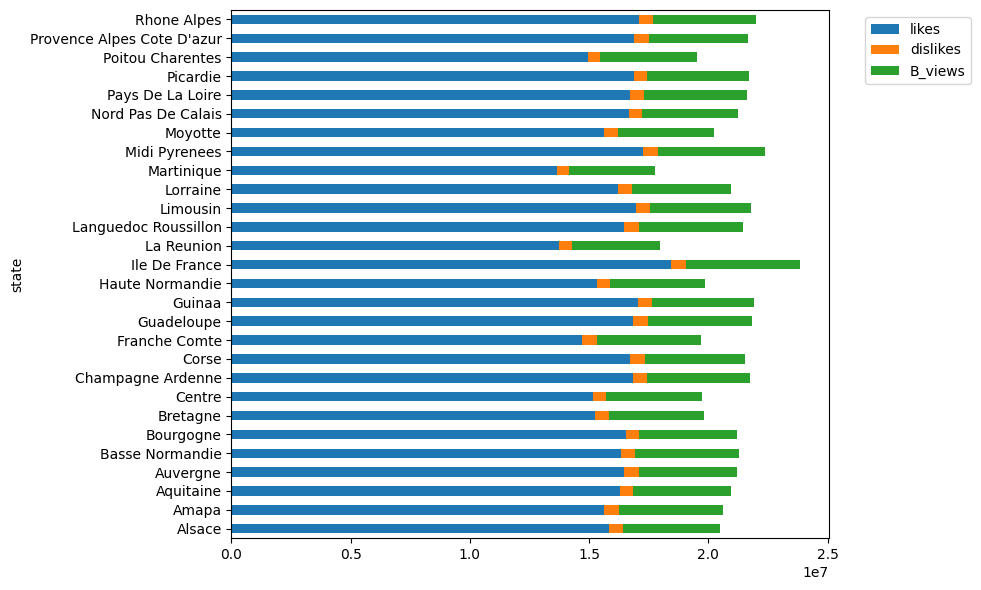

In [29]:
nros = YTDATA[['state']+cols_use].groupby('state').sum()

ax = nros.plot(kind='barh', stacked=True, figsize=(10, 6))

print(f"El estado con más 'Likes' es: {nros['likes'].idxmax()}")
print(f"El estado con más 'Dislikes' es: {nros['dislikes'].idxmax()}")
print(f"El estado con más 'Views' es: {nros['B_views'].idxmax()}")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Calcular los días en tendencia por canal
t_days = YTDATA.groupby('channel_number')['trending_date'].nunique().reset_index(name='days_trend')
YTDATA = YTDATA.merge(t_days[['channel_number', 'days_trend']], on='channel_number', how='left')

In [ ]:
YTDATA['kviews'] = YTDATA['views'] /100 # vistas reducidas

cols_2 = ['likes','dislikes','kviews','days_trend','category_id','comment_count']

# Variables para predecir (dependiente) e (independientes)
xdata =  [
          'likes',
          'dislikes',
          #'kviews',
          'days_trend','category_id','comment_count']
# dislikes
pred_y_val = 'kviews'
YTDATA_p =['Pred','kviews']

YTDATA[cols_2].sample(5)

,likes,dislikes,kviews,days_trend,category_id,comment_count
7482,4778,59,444.43,2,28,501
24924,1290,309,1247.18,35,22,196
279,5715,2368,2040.51,1,28,1561
4731,1344,192,1491.13,10,22,89
21771,3175,62,426.26,38,26,201


In [ ]:
#sns.pairplot(YTDATA[cols_2])

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV

ydata = [pred_y_val]
X = YTDATA[xdata]  # Variables independientes
y = YTDATA[ydata]  # Variable dependiente

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)

# Cuadricula de parametros para encontrar los mejores valores
grid = {
    #'max_depth': [2,10],
    'max_depth': list(range(2, 101, 10)),  # De 100 grupos de 10

    #'min_samples_split': [2, 10, 20, 50, 60, 70, 100, 200],
    'min_samples_split': list(range(2, 101, 10)),  # De 100 grupos de 10

    'min_samples_leaf': [10, 50, 100],
    #'min_samples_leaf': list(range(1, 101, 20)), # De 100 grupos de 20
    'ccp_alpha': [0.0, 0.01, 0.1, 0.2]

}
Grid_tree_model = GridSearchCV(DecisionTreeRegressor(random_state=42), 
                           grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
Grid_tree_model.fit(X_train, y_train)

# Recuperar el mejor modelo
best_model = Grid_tree_model.best_estimator_
print("\nMejores parametros encontrados:")
for param, value in Grid_tree_model.best_params_.items():
    print(f"{param}: {value}")

print("\n")

# Hacer predicciones usando el modelo optimizado
y_pred = best_model.predict(X_test)

# Crear un DataFrame con los resultados
YTDATA_pred = pd.DataFrame(X_test)
YTDATA_pred = YTDATA_pred.assign(kviews=y_test.values.flatten())
YTDATA_pred = YTDATA_pred.assign(Pred=y_pred.flatten().tolist())

# Muestra aleatoria de resultados
print(YTDATA_pred[YTDATA_p].sample(10))
print("\n")

# Metricas del modelo
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("Precisión del Modelo (R²):")
print(r2)

# Mensaje sobre la factibilidad del modelo
if r2 > 0.60:
    print("El modelo es factible para la prediccion.")
else:
    print("El modelo no es factible para la prediccion.")

print("\n")

Forma de X_train: (32579, 5)
Forma de X_test: (8145, 5)
Fitting 5 folds for each of 1200 candidates, totalling 6000 fits

Mejores parametros encontrados:
ccp_alpha: 0.0
max_depth: 22
min_samples_leaf: 10
min_samples_split: 72


              Pred   kviews
15920    48.557391    48.94
7029   3463.959429  3568.33
39930  1365.816481  1297.02
7359    148.862250    40.28
10496  1318.956765   437.62
34673   487.129020  1396.44
14664  1351.950889  1974.15
20992    43.192667    53.11
7755    277.088261   204.40
11699   685.483333  1176.25


MAE: 1438.43532882286
MSE: 14411075.865360036
RMSE: 3796.1922850877872
Precisión del Modelo (R²):
0.6217514344823838
El modelo es factible para la prediccion.




c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


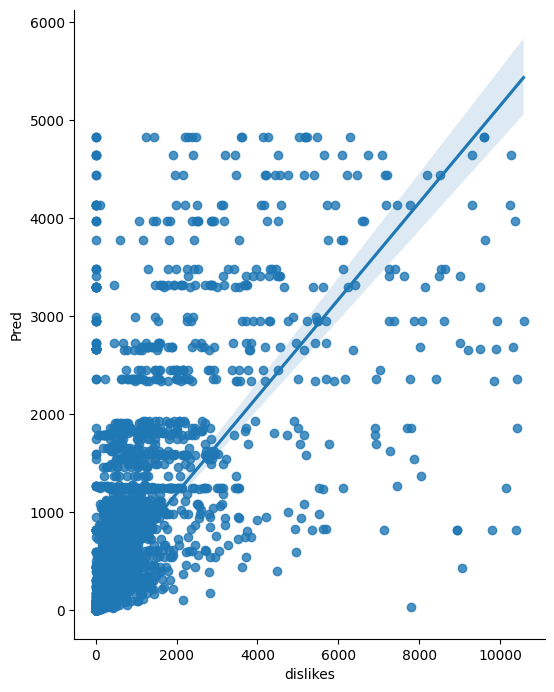

In [ ]:
# Gráfico de dispersión con seaborn
sns.pairplot(YTDATA_pred, x_vars=[pred_y_val], y_vars='Pred', size=7, aspect=0.8, kind='reg')

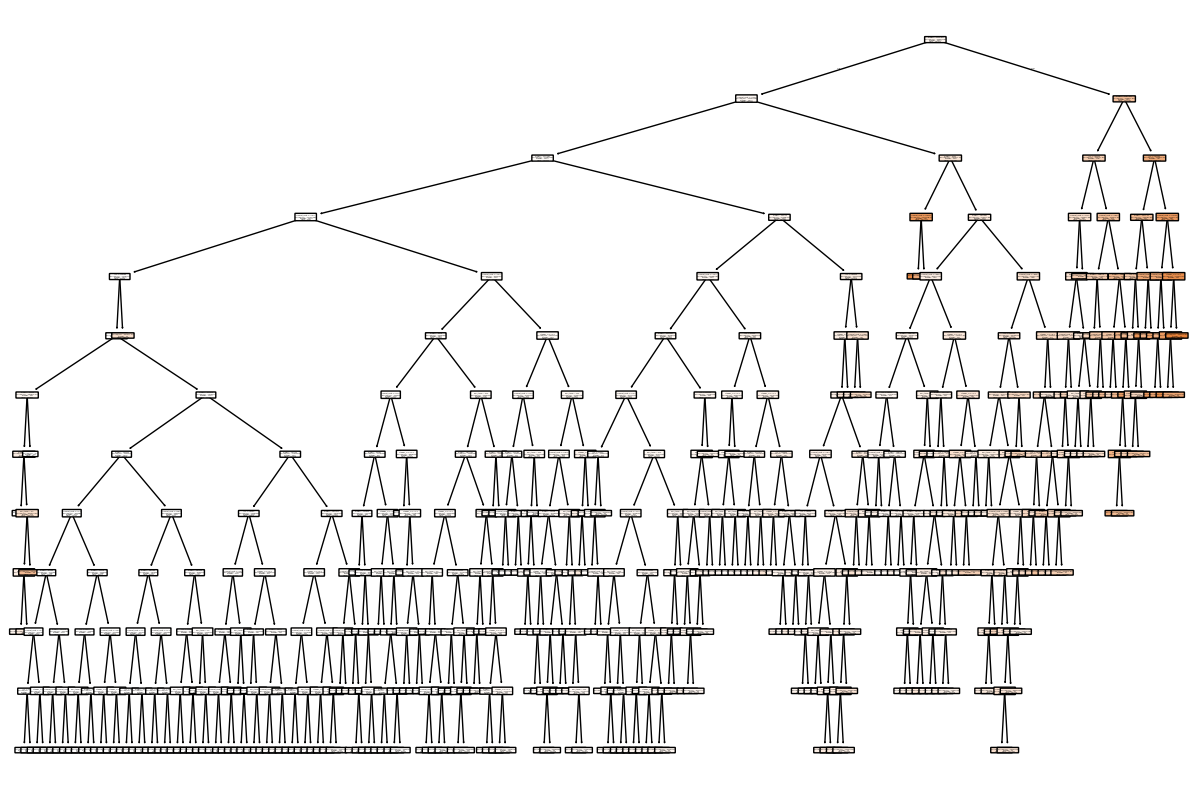

In [ ]:
# Visualización del árbol de decisión
plt.figure(figsize=(15, 10))
plot_tree(best_model, feature_names=xdata, filled=True, rounded=True)
plt.show()

# ¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben?

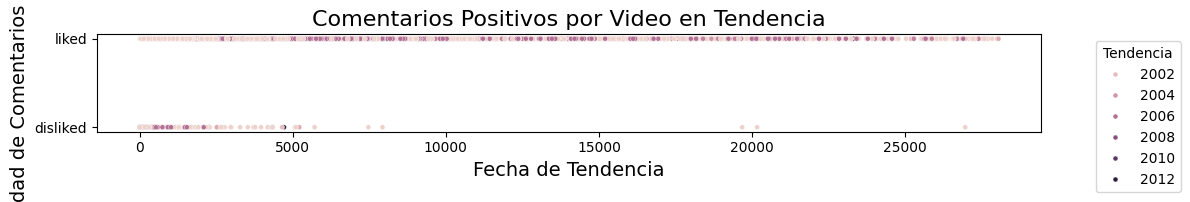

Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben  a lo largo del tiempo


In [ ]:
plt.figure(figsize=(12, 2))
sns.scatterplot(data=YTDATA, x='comment_count', y='likes_value', s=13,  hue='trending_year')

plt.title('Comentarios Positivos por Video en Tendencia', fontsize=16)
plt.xlabel('Fecha de Tendencia', fontsize=14)
plt.ylabel('Cantidad de Comentarios Positivos', fontsize=14)
plt.legend(title='Tendencia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben  a lo largo del tiempo")
